In [1]:
import pandas as pd

feat = pd.read_csv("dataset_tg.csv")
feat.head()

/tmp/ipykernel_1633/802279336.py:3: DtypeWarning: Columns (89) have mixed types. Specify dtype option on import or set low_memory=False.
  feat = pd.read_csv("dataset_tg.csv")


,Unnamed: 0.1,Unnamed: 0,message_id,views_o0,views_o1,views_o2,views_o3,forwards_o0,forwards_o1,forwards_o2,...,best_ctr_reactions_0_3,viral_ml,viral_final,llm_json,is_economic,topic,confidence,reason,economic_signals,noise_signals
0,0,0,00027151-a524-4d93-a820-116398fb81bb,492127.0,603269.0,619397.0,625475.0,381.0,415.0,449.0,...,NaN,-0.173209,0.406649,"{'confidence': 0.96, 'economic_signals': array...",False,NaN,0.96,Текст содержит лишь политические и военные выс...,NaN,NaN
1,1,2,0003b835-cf4a-43ff-b155-a144cf56b7f8,486195.0,507393.0,514469.0,517508.0,273.0,273.0,273.0,...,NaN,-0.150123,0.445509,"{'confidence': 0.9, 'economic_signals': array(...",False,NaN,0.90,Новость посвящена уголовному делу о хищении ср...,NaN,NaN
2,2,4,0005535a-74a9-4cb9-853f-ce04612d2f94,455967.0,609468.0,627631.0,634731.0,448.0,551.0,551.0,...,NaN,-0.170353,0.396754,"{'confidence': 0.95, 'economic_signals': array...",False,NaN,0.95,Новость описывает процесс поступления детей в ...,NaN,NaN
3,3,7,0007e2f8-787d-404f-91ff-e2582096a4a7,22376.0,23594.0,23735.0,23825.0,5.0,9.0,9.0,...,NaN,0.005396,0.703622,"{'confidence': 0.96, 'economic_signals': array...",True,Санкции и геополитика,0.96,Новость посвящена позиции Сербии по санкциям Е...,NaN,NaN
4,4,8,000884a5-8291-4ec1-805f-ac131112aaf7,19493.0,20605.0,NaN,NaN,64.0,67.0,NaN,...,0.00041,0.024601,0.680369,"{'confidence': 0.96, 'economic_signals': array...",True,Рынки капитала,0.96,Новость описывает падение фондового рынка и ра...,NaN,NaN


In [2]:
feat.columns

Index(['Unnamed: 0', 'message_id', 'views_o0', 'views_o1', 'views_o2',
       'views_o3', 'forwards_o0', 'forwards_o1', 'forwards_o2', 'forwards_o3',
       'reactions_o0', 'reactions_o1', 'reactions_o2', 'reactions_o3',
       'replies_o0', 'replies_o1', 'replies_o2', 'replies_o3', 'id_channel',
       'subscribers', 'types_reactions', 'has_forwards', 'has_reactions',
       'has_replies', 'date', 'message', 'message_vector', 'dayofweek', 'hour',
       'has_o0', 'has_o1', 'has_o2', 'has_o3', 'delta_views_o0',
       'delta_views_o1', 'delta_views_o2', 'delta_views_o3',
       'delta_forwards_o0', 'delta_forwards_o1', 'delta_forwards_o2',
       'delta_forwards_o3', 'delta_reactions_o0', 'delta_reactions_o1',
       'delta_reactions_o2', 'delta_reactions_o3', 'delta_replies_o0',
       'delta_replies_o1', 'delta_replies_o2', 'delta_replies_o3',
       'delta_views_per_sub_o0', 'views_per_sub_o0', 'forwards_per_sub_o0',
       'reactions_per_sub_o0', 'ctr_forwards_o0', 'ctr_reactions_o

In [8]:
df = feat[['message_id', 'id_channel', 'message', 'viral_final']]
df.head()

,message_id,id_channel,message,viral_final
0,00027151-a524-4d93-a820-116398fb81bb,3,"Европа делает ""самоубийственное движение"", ког...",0.468767
1,0003b835-cf4a-43ff-b155-a144cf56b7f8,3,Верховный суд Ингушетии отправил под арест быв...,0.428130
2,0005535a-74a9-4cb9-853f-ce04612d2f94,3,Свыше миллиона детей пойдут в первый класс в э...,0.456934
3,00064231-2c13-48f7-8f07-9abf2b049b89,1,❗️Бывший президент Сирии Башар Асад накануне с...,0.666604
4,0006e10d-39d5-48fd-b5d8-3fbc732d09f4,6,Сегодня на рынке жилья сложилась патовая ситуа...,0.746281


In [9]:
df.shape

(67255, 4)

In [10]:
prompt = """
Ты — разметчик новостей для исследования экономических нарративов.

ЗАДАЧА
По тексту ОДНОЙ новости:
1) определить, относится ли она к экономике (is_economic)
2) если is_economic=true — присвоить ровно ОДИН тематический класс topic из списка ниже

СПИСОК КЛАССОВ (topic)
Ровно один из:
- "Макроэкономика"
- "Рынки капитала"
- "Корпоративные финансы"
- "Санкции и геополитика"
- "Сырьевые рынки"
- "Валютный рынок"
- "Государственная экономическая политика"
- "Международная торговля"
- "Другое"

ОПРЕДЕЛЕНИЕ “ЭКОНОМИЧЕСКОЙ” НОВОСТИ
Считай новость экономической (is_economic=true), если в ней есть СУЩЕСТВЕННОЕ содержание хотя бы по одному из пунктов:
- Макроэкономика и состояние экономики: инфляция, ВВП, безработица, бюджет/дефицит, доходы населения, цены, промышленность, потребление и т.п.
- Финансы/банки/кредит/ипотека/процентные ставки, решения ЦБ/регуляторов, финансовое регулирование.
- Валюты и курсы: рубль/доллар/евро и др., валютные ограничения.
- Рынки капитала: акции, облигации, индексы, доходности, биржи, IPO.
- Корпоративные финансы: отчётность, прибыль/убыток, дивиденды, M&A, банкротства.
- Сырьевые рынки: нефть/газ/уголь/металлы/зерно и др. как рынок (цены, спрос/предложение, поставки, квоты).
- Санкции/геополитика — ТОЛЬКО если явно есть экономическое измерение (финансовые ограничения, экспорт/импорт, цены, дефицит, рынки, бюджет, цепочки поставок).
- Государственная экономическая политика: налоги, пошлины, тарифы, субсидии, госпрограммы, бюджетные решения, регулирование цен/рынков.
- Международная торговля: экспорт/импорт, таможня, квоты, торговые соглашения, логистика поставок как фактор торговли.

Считай новость НЕ экономической (is_economic=false), если:
- Основной смысл — развлечения/мемы/погода/гороскоп/спорт/культура/криминал без экономического измерения.
- Реклама/промо/розыгрыши/подписки/букмекерские ставки и т.п. (даже если встречается слово “ставка”, но в спортивном/промо-контексте).

ПРАВИЛО “СУЩЕСТВЕННОСТИ”
- Если деньги/цены/зарплаты упомянуты вскользь и без фактов/мер/последствий/контекста — чаще is_economic=false.
- Если есть факты, меры, последствия, цифры, решения регуляторов, влияние на рынки/торговлю/бюджет — is_economic=true.

КАК ВЫБИРАТЬ topic (ТОЛЬКО ЕСЛИ is_economic=true)
Выбери самый “главный” фокус новости. Если упоминается несколько тем, выбирай по приоритету:
(1) конкретное решение/событие, которое является ядром новости
(2) то, чему посвящено больше всего текста/фактов/цифр
(3) то, что описывает основной механизм влияния (например, через валютный курс или санкции)

КРАТКИЕ КРИТЕРИИ КЛАССОВ
- "Макроэкономика": инфляция, ВВП, безработица, рост/рецессия, индекс деловой активности, общие показатели экономики.
- "Рынки капитала": акции/облигации/индексы/биржи/доходности/IPO, движение котировок, размещения.
- "Корпоративные финансы": финрезультаты компаний, дивиденды, сделки M&A, банкротства, долговая нагрузка компаний.
- "Санкции и геополитика": санкции/ограничения/конфискации/эмбарго/политические решения с явным экономическим эффектом (финансы, торговля, рынки, бюджет, цепочки поставок).
- "Сырьевые рынки": нефть/газ/металлы/зерно и др. — цены, добыча, поставки, OPEC, экспорт сырья как рынок.
- "Валютный рынок": курсы валют, интервенции, валютный контроль, FX-ликвидность, привязки/коридоры.
- "Государственная экономическая политика": налоги, пошлины, тарифы, субсидии, регулирование, бюджетные меры, госпрограммы, госрасходы.
- "Международная торговля": экспорт/импорт, торговые соглашения, квоты, таможенные меры, торговые потоки и логистика как фактор торговли.
- "Другое": экономическая новость, но не укладывается уверенно в классы выше (например, рынок труда в узком секторе без макрофокуса, потребительские тренды без макро-метрик, технологические/отраслевые сюжеты без явного попадания в классы и т.п.).

ОБЯЗАТЕЛЬНОЕ ПРАВИЛО
Если is_economic=false, то topic должен быть null.

ВЫХОД (СТРОГО JSON, БЕЗ ЛИШНЕГО ТЕКСТА)
Верни только JSON:

{
  "is_economic": true/false,
  "topic": "один из классов выше" или null,
  "confidence": 0.0,
  "reason": "1-2 коротких предложения: почему так",
  "economic_signals": ["2-6 ключевых сигналов/терминов из текста (если is_economic=true)"],
  "noise_signals": ["1-4 сигнала шума (если применимо)"]
}

ШКАЛА confidence
- 0.9–1.0: очевидно
- 0.6–0.8: экономическое есть, но не центральное / тема смешанная, но класс выбирается уверенно
- 0.4–0.5: погранично

ВХОД
Текст новости:
<<<{news_text}>>>
"""


In [12]:
df = df.rename(columns={'message':'query'})
df.head()

,message_id,id_channel,query,viral_final
0,00027151-a524-4d93-a820-116398fb81bb,3,"Европа делает ""самоубийственное движение"", ког...",0.468767
1,0003b835-cf4a-43ff-b155-a144cf56b7f8,3,Верховный суд Ингушетии отправил под арест быв...,0.428130
2,0005535a-74a9-4cb9-853f-ce04612d2f94,3,Свыше миллиона детей пойдут в первый класс в э...,0.456934
3,00064231-2c13-48f7-8f07-9abf2b049b89,1,❗️Бывший президент Сирии Башар Асад накануне с...,0.666604
4,0006e10d-39d5-48fd-b5d8-3fbc732d09f4,6,Сегодня на рынке жилья сложилась патовая ситуа...,0.746281


In [13]:
import importlib
import labeling.llm_labeling_pipeline as llmp

importlib.reload(llmp)

from labeling.llm_labeling_pipeline import LlmLabelingConfig, LlmLabelingPipeline

display(df.head())

from datetime import datetime
run_tag = datetime.now().strftime("%Y%m%d_%H%M%S")

cfg = LlmLabelingConfig(
    text_col="query",
    helpers_path="labeling", 
    tmp_root=None,                
    cleanup_tmp=False,
    chunk_size=35000,            
    max_parallel=2,
    system_prompt=prompt,
    as_json=True,
)

pipeline = LlmLabelingPipeline(cfg, input_df=df)

out_path, labeled_df = pipeline.run(save_merged=True)

print("Merged parquet:", out_path)
labeled_df.head()

,message_id,id_channel,query,viral_final
0,00027151-a524-4d93-a820-116398fb81bb,3,"Европа делает ""самоубийственное движение"", ког...",0.468767
1,0003b835-cf4a-43ff-b155-a144cf56b7f8,3,Верховный суд Ингушетии отправил под арест быв...,0.428130
2,0005535a-74a9-4cb9-853f-ce04612d2f94,3,Свыше миллиона детей пойдут в первый класс в э...,0.456934
3,00064231-2c13-48f7-8f07-9abf2b049b89,1,❗️Бывший президент Сирии Башар Асад накануне с...,0.666604
4,0006e10d-39d5-48fd-b5d8-3fbc732d09f4,6,Сегодня на рынке жилья сложилась патовая ситуа...,0.746281


[INIT] tmp_root = /workdir/project/tmp_files_run_20251217_000712
[INIT] helpers_path = /workdir/project/labeling
[PROMPT] updated SYSTEM_PROMPT in /workdir/project/labeling/system_prompt.py
[LOAD] using in-memory DataFrame
[LOAD] shape raw = (67255, 4)
[LOAD] shape after dedup[query] = (66981, 4)
[LOAD] N unique texts = 66981, chunk_size = 35000, num_chunks = 2
[CHUNKS] writing & uploading 2 chunks...
[CHUNKS] [chunk 0] 35000 rows -> /workdir/project/tmp_files_run_20251217_000712/data/data_0/data_for_labeling_0_dedup.csv
[UPLOAD] s3://ecom-ml-dolyame-search/labeling_tmp/tmp_artem/20251217_000712/data_for_labeling_0_dedup.csv
[CHUNKS] [chunk 1] 31981 rows -> /workdir/project/tmp_files_run_20251217_000712/data/data_1/data_for_labeling_1_dedup.csv
[UPLOAD] s3://ecom-ml-dolyame-search/labeling_tmp/tmp_artem/20251217_000712/data_for_labeling_1_dedup.csv
[RUN_DIRS] preparing in /workdir/project/tmp_files_run_20251217_000712/runs
[RUN_DIRS] +folder: /workdir/project/tmp_files_run_20251217_000

,message_id,id_channel,query,viral_final,llm_raw,llm_json
0,00027151-a524-4d93-a820-116398fb81bb,3,"Европа делает ""самоубийственное движение"", ког...",0.468767,"{\n ""is_economic"": false,\n ""topic"": null,\n...","{'confidence': 0.96, 'economic_signals': [], '..."
1,0003b835-cf4a-43ff-b155-a144cf56b7f8,3,Верховный суд Ингушетии отправил под арест быв...,0.428130,"{\n ""is_economic"": false,\n ""topic"": null,\n...","{'confidence': 0.9, 'economic_signals': [], 'e..."
2,0005535a-74a9-4cb9-853f-ce04612d2f94,3,Свыше миллиона детей пойдут в первый класс в э...,0.456934,"{\n ""is_economic"": false,\n ""topic"": null,\n...","{'confidence': 0.95, 'economic_signals': [], '..."
3,00064231-2c13-48f7-8f07-9abf2b049b89,1,❗️Бывший президент Сирии Башар Асад накануне с...,0.666604,"{\n ""is_economic"": false,\n ""topic"": null,\n...","{'confidence': 0.95, 'economic_signals': [], '..."
4,0006e10d-39d5-48fd-b5d8-3fbc732d09f4,6,Сегодня на рынке жилья сложилась патовая ситуа...,0.746281,"{\n ""is_economic"": true,\n ""topic"": ""Макроэк...","{'confidence': 0.95, 'economic_signals': ['зав..."


In [14]:
labeled_df.to_csv("labeled_posts.csv")

In [15]:
import json
import pandas as pd

labeled_df = labeled_df.drop(columns=['llm_raw'], errors='ignore')

def parse_llm_json(x):
    if pd.isna(x):
        return {}
    if isinstance(x, dict):
        return x
    if isinstance(x, str):
        x = x.strip()
        if not x:
            return {}
        try:
            return json.loads(x)
        except Exception:
            return {}
    return {}

parsed = labeled_df['llm_json'].apply(parse_llm_json)

labeled_df['is_economic'] = parsed.apply(lambda d: d.get('is_economic'))
labeled_df['topic'] = parsed.apply(lambda d: d.get('topic'))
labeled_df['confidence'] = parsed.apply(lambda d: d.get('confidence'))
labeled_df['reason'] = parsed.apply(lambda d: d.get('reason'))
labeled_df['economic_signals'] = parsed.apply(lambda d: d.get('economic_signals'))
labeled_df['noise_signals'] = parsed.apply(lambda d: d.get('noise_signals'))

labeled_df['economic_signals'] = labeled_df['economic_signals'].apply(
    lambda x: ", ".join(x) if isinstance(x, list) else None
)
labeled_df['noise_signals'] = labeled_df['noise_signals'].apply(
    lambda x: ", ".join(x) if isinstance(x, list) else None
)
labeled_df = labeled_df.rename(columns={'query':"message"})


In [16]:
labeled_df.to_csv("labeled_posts_full.csv")

In [1]:
import pandas as pd

labeled_df = pd.read_csv("labeled_posts_full.csv")

/tmp/ipykernel_339/1050790247.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  labeled_df = pd.read_csv("labeled_posts_full.csv")


In [2]:
labeled_df.head()

,Unnamed: 0,message_id,id_channel,message,viral_final,llm_json,is_economic,topic,confidence,reason,economic_signals,noise_signals
0,0,00027151-a524-4d93-a820-116398fb81bb,3,"Европа делает ""самоубийственное движение"", ког...",0.468767,"{'confidence': 0.96, 'economic_signals': array...",False,NaN,0.96,Текст содержит лишь политические и военные выс...,NaN,NaN
1,1,0003b835-cf4a-43ff-b155-a144cf56b7f8,3,Верховный суд Ингушетии отправил под арест быв...,0.428130,"{'confidence': 0.9, 'economic_signals': array(...",False,NaN,0.90,Новость посвящена уголовному делу о хищении ср...,NaN,NaN
2,2,0005535a-74a9-4cb9-853f-ce04612d2f94,3,Свыше миллиона детей пойдут в первый класс в э...,0.456934,"{'confidence': 0.95, 'economic_signals': array...",False,NaN,0.95,Новость описывает процесс поступления детей в ...,NaN,NaN
3,3,00064231-2c13-48f7-8f07-9abf2b049b89,1,❗️Бывший президент Сирии Башар Асад накануне с...,0.666604,"{'confidence': 0.95, 'economic_signals': array...",False,NaN,0.95,Новость сосредоточена на политических перегово...,NaN,NaN
4,4,0006e10d-39d5-48fd-b5d8-3fbc732d09f4,6,Сегодня на рынке жилья сложилась патовая ситуа...,0.746281,"{'confidence': 0.95, 'economic_signals': array...",True,Макроэкономика,0.95,"Новость описывает состояние рынка жилья, цены,...",NaN,NaN


In [3]:
labeled_df["is_economic"].value_counts()

is_economic
False    35962
True     31292
Name: count, dtype: int64

In [20]:
labeled_df[labeled_df["is_economic"]==True]["topic"].value_counts()

topic
Государственная экономическая политика    9040
Корпоративные финансы                     4572
Макроэкономика                            3978
Санкции и геополитика                     3582
Рынки капитала                            3169
Сырьевые рынки                            2114
Международная торговля                    1825
Другое                                    1608
Валютный рынок                            1400
Сырьевые рынры                               3
Сырьевые рын рынки                           1
Name: count, dtype: int64

In [1]:
import pandas as pd
labeled_df = pd.read_csv("labeled_posts_full.csv")

/tmp/ipykernel_345/2898943466.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  labeled_df = pd.read_csv("labeled_posts_full.csv")


In [2]:
labeled_df.columns

Index(['Unnamed: 0', 'message_id', 'id_channel', 'message', 'viral_final',
       'llm_json', 'is_economic', 'topic', 'confidence', 'reason',
       'economic_signals', 'noise_signals'],
      dtype='object')

In [3]:
economic = labeled_df[labeled_df["is_economic"] == True][["message_id", "id_channel", "message", "viral_final", "is_economic", "topic", "confidence", "reason"]]

In [4]:
economic.head()

,message_id,id_channel,message,viral_final,is_economic,topic,confidence,reason
4,0006e10d-39d5-48fd-b5d8-3fbc732d09f4,6,Сегодня на рынке жилья сложилась патовая ситуа...,0.746281,True,Макроэкономика,0.95,"Новость описывает состояние рынка жилья, цены,..."
5,0007e2f8-787d-404f-91ff-e2582096a4a7,18,Сербия согласна поддержать санкции Евросоюза п...,0.542513,True,Санкции и геополитика,0.96,Новость посвящена позиции Сербии по санкциям Е...
6,000884a5-8291-4ec1-805f-ac131112aaf7,6,Китайский рынок акций упал сильнее всего с апр...,0.588634,True,Рынки капитала,0.96,Новость описывает падение фондового рынка и ра...
7,000a6ee0-13d8-4b05-8200-67d9fd3725d0,4,Переход к банкингу будущего может принести стр...,0.362871,True,Другое,0.96,Текст описывает финансовый сектор и потенциаль...
8,000b0331-92a9-4eb4-9f58-d00811257758,18,Министерство труда США отменило рекомендации 2...,0.422529,True,Государственная экономическая политика,0.95,Новость описывает изменение регулятивных реком...


In [5]:
economic["topic"] = economic["topic"].replace({
    "Сырьевые рын рынки": "Сырьевые рынки",
    "Сырьевые рынры": "Сырьевые рынки",
})

In [6]:
economic["topic"].value_counts()

topic
Государственная экономическая политика    9040
Корпоративные финансы                     4572
Макроэкономика                            3978
Санкции и геополитика                     3582
Рынки капитала                            3169
Сырьевые рынки                            2118
Международная торговля                    1825
Другое                                    1608
Валютный рынок                            1400
Name: count, dtype: int64

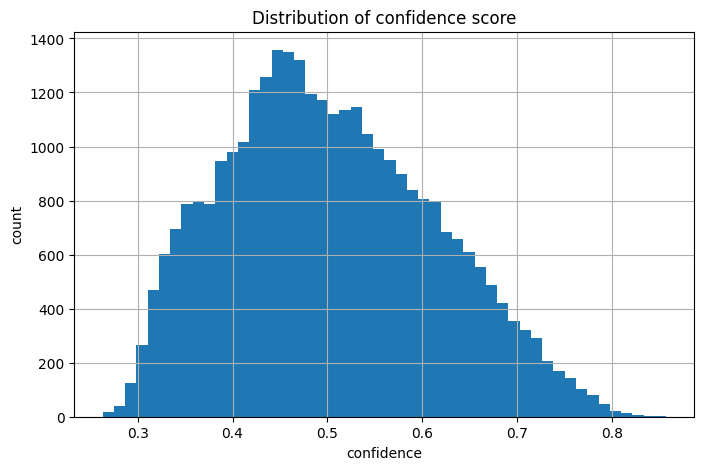

In [43]:
import matplotlib.pyplot as plt


data = economic.sort_values("viral_final")["viral_final"]

plt.figure(figsize=(8, 5))
plt.hist(data, bins=50)
plt.xlabel("confidence")
plt.ylabel("count")
plt.title("Distribution of confidence score")
plt.grid(True)
plt.show()

In [44]:
import numpy as np
import pandas as pd

def stratified_sample_topic_quantile_bands(
    df: pd.DataFrame,
    N: int,
    score_col: str = "viral_final",
    topic_col: str = "topic",
    bands=None,
    seed: int = 42,
    replace_if_needed: bool = True,
):
    rng = np.random.default_rng(seed)
    d = df.copy()
    d = d[d[score_col].notna() & d[topic_col].notna()].copy()

    if bands is None:
        bands = [
            (0.90, 1.00, 0.30),
            (0.75, 0.90, 0.20),
            (0.50, 0.75, 0.20),
            (0.25, 0.50, 0.20),
            (0.00, 0.25, 0.10),
        ]

    # нормализуем доли на всякий случай
    total_share = sum(b[2] for b in bands)
    bands = [(a, b, s / total_share) for a, b, s in bands]

    # посчитаем реальные пороги значений по score_col
    qs = sorted(set([x for band in bands for x in band[:2]]))
    qvals = d[score_col].quantile(qs).to_dict()

    # присвоим band_id
    band_edges = []
    band_labels = []
    for i, (qlo, qhi, _) in enumerate(bands):
        lo = qvals[qlo]
        hi = qvals[qhi]
        band_edges.append((lo, hi, i))
        band_labels.append(f"q{int(qlo*100):02d}-q{int(qhi*100):02d}")

    def assign_band(x):
        for (lo, hi, i), (_, qhi, _) in zip(band_edges, bands):
            # правую границу включаем только у самого верхнего бина
            is_top = (qhi == 1.0)
            if (x >= lo) and (x <= hi if is_top else x < hi):
                return i
        # если из-за дублей/краёв не попали — отправим в самый нижний
        return 0

    d["band_id"] = d[score_col].apply(assign_band)

    topics = sorted(d[topic_col].unique())
    n_topics = len(topics)
    base = N // n_topics
    rem = N % n_topics
    topic_targets = {t: base + (1 if i < rem else 0) for i, t in enumerate(topics)}

    shares = np.array([s for (_, _, s) in bands], dtype=float)

    out = []
    for t in topics:
        td = d[d[topic_col] == t]
        tN = topic_targets[t]

        # сколько нужно на каждый band внутри topic
        counts = np.floor(tN * shares).astype(int)
        residual = tN - counts.sum()
        if residual > 0:
            frac = (tN * shares) - np.floor(tN * shares)
            for idx in np.argsort(-frac)[:residual]:
                counts[idx] += 1

        picked_idx = []

        deficits = 0
        for band_i, need in enumerate(counts):
            need = int(need)
            if need == 0:
                continue
            strata = td[td["band_id"] == band_i]
            if len(strata) >= need:
                picked_idx.extend(
                    strata.sample(n=need, replace=False, random_state=int(rng.integers(1e9))).index
                )
            else:
                if len(strata) > 0:
                    picked_idx.extend(
                        strata.sample(n=need, replace=replace_if_needed, random_state=int(rng.integers(1e9))).index
                        if replace_if_needed else strata.index
                    )
                    if not replace_if_needed and len(strata) < need:
                        deficits += (need - len(strata))
                else:
                    deficits += need

        cur = d.loc[picked_idx]
        if len(cur) < tN:
            extra = td.drop(index=set(picked_idx), errors="ignore")
            if len(extra) == 0 and replace_if_needed:
                extra_pick = td.sample(n=(tN - len(cur)), replace=True, random_state=int(rng.integers(1e9)))
            else:
                extra_pick = extra.sample(n=min(tN - len(cur), len(extra)), replace=False,
                                          random_state=int(rng.integers(1e9)))
                if len(extra_pick) < (tN - len(cur)) and replace_if_needed:
                    extra2 = td.sample(n=(tN - len(cur) - len(extra_pick)), replace=True,
                                       random_state=int(rng.integers(1e9)))
                    extra_pick = pd.concat([extra_pick, extra2])
            cur = pd.concat([cur, extra_pick], ignore_index=False)

        out.append(cur)

    sample_df = pd.concat(out, ignore_index=True)
    if len(sample_df) > N:
        sample_df = sample_df.sample(n=N, random_state=int(rng.integers(1e9))).reset_index(drop=True)

    sample_df["band_label"] = sample_df["band_id"].map({i: band_labels[i] for i in range(len(band_labels))})

    return sample_df


In [45]:
bands = [
    (0.90, 1.00, 0.30), 
    (0.75, 0.90, 0.20),  
    (0.50, 0.75, 0.20),
    (0.25, 0.50, 0.20),
    (0.00, 0.25, 0.10),
]

sample = stratified_sample_topic_quantile_bands(
    economic, N=200, bands=bands, replace_if_needed=True, seed=42
)

display(sample["topic"].value_counts())
sample["band_label"].value_counts(normalize=True).sort_index()


topic
Валютный рынок                            23
Государственная экономическая политика    23
Другое                                    22
Корпоративные финансы                     22
Макроэкономика                            22
Международная торговля                    22
Рынки капитала                            22
Санкции и геополитика                     22
Сырьевые рынки                            22
Name: count, dtype: int64

band_label
q00-q25     0.090
q25-q50     0.180
q50-q75     0.190
q75-q90     0.225
q90-q100    0.315
Name: proportion, dtype: float64

In [52]:
sample.to_csv("sample.csv")